In [1]:
import numpy as np
import xarray as xr
import cartopy.crs
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LinearSegmentedColormap
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [2]:
colors_operability = [(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(255/256,127/256,80/256),(255/256,127/256,80/256),(255/256,255/256,51/256),(255/256,255/256,51/256),(0,204/256,0)]
colors_wavepower = [(0,204/256,0),(255/256,255/256,51/256),(255/256,255/256,51/256),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0),(1,0,0)]
name='my_list'
cwind ='#00a390'
cwave ='#eb7245'
cig ='#c41e79'
cwpow = '#77d3e9'
cmoperability = LinearSegmentedColormap.from_list(name, colors_operability, N=256)
cmwavepower = LinearSegmentedColormap.from_list(name, colors_wavepower, N=256)

In [3]:
data = pd.read_excel(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\model\output\output_run8_4560locs_d20_w138_s_2_i_005.xlsx')
bath = xr.open_dataset(r'c:\Users\wiegel\OneDrive - Stichting Deltares\Documents\input\ERA5_metOcean_bathy.nc')

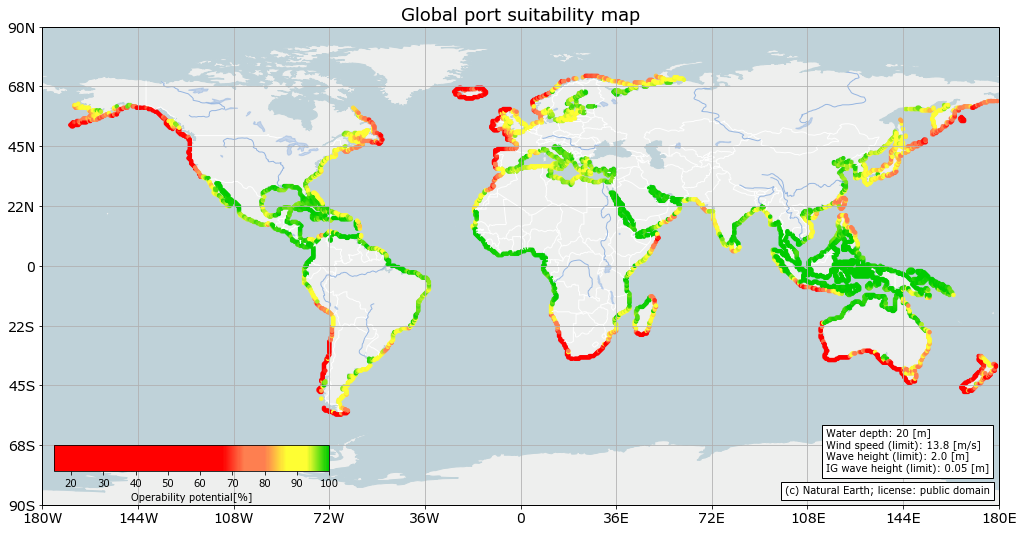

In [12]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data['operability'], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability potential[%]', orientation='horizontal')
ax.set_title('Global port suitability map', fontsize=18)
plt.savefig('global_port_operability_map_4.png', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Port operability map (1979-01-01 - 2018-12-31)')

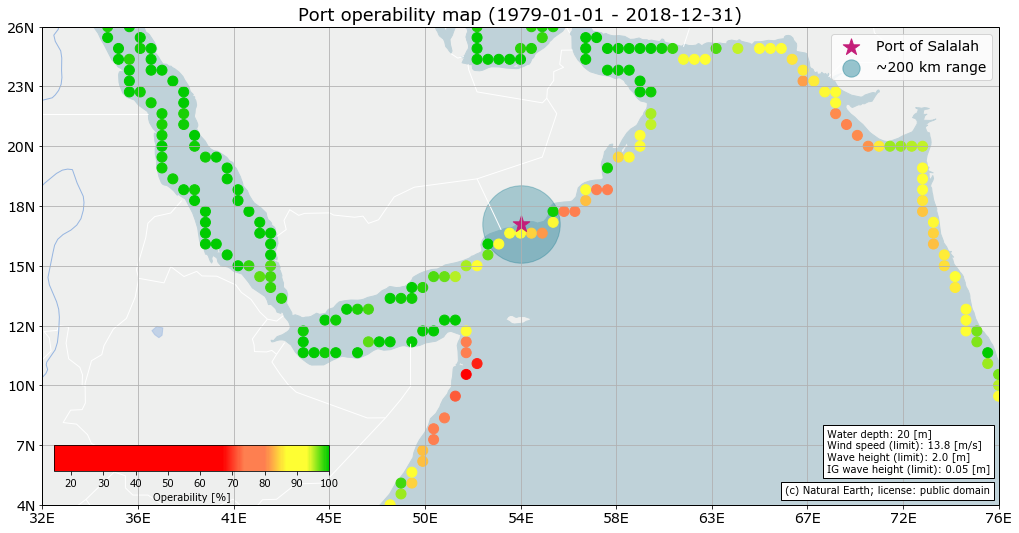

In [49]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(32,76)
_ = ax.set_ylim(4,26)
_ = ax.set_xticks(np.linspace(32,76, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(4,26, num=9), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.scatter(54, 16.9, c='#007188', marker='o', s=6000, alpha=0.3)
pc = ax.scatter(data['lon'],data['lat'], c=data['operability'], s=100, cmap=cmoperability)#, cmap='RdYlGn_r')
ax.scatter(54, 16.9, c='#c41e79', marker='*', s=300, label='Port of Salalah')      
ax.scatter(72, 6, c='#007188', marker='o', s=300, alpha=0.4, label='~200 km range')      
#ax.contour(X, Y, depth2)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(68.1, 5.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.legend(fontsize=14)
ax.set_title('Port operability map (1979-01-01 - 2018-12-31)', fontsize=18)
#plt.savefig('global_port_operability_map_4_zoom.png', dpi=300, bbox_inches='tight');

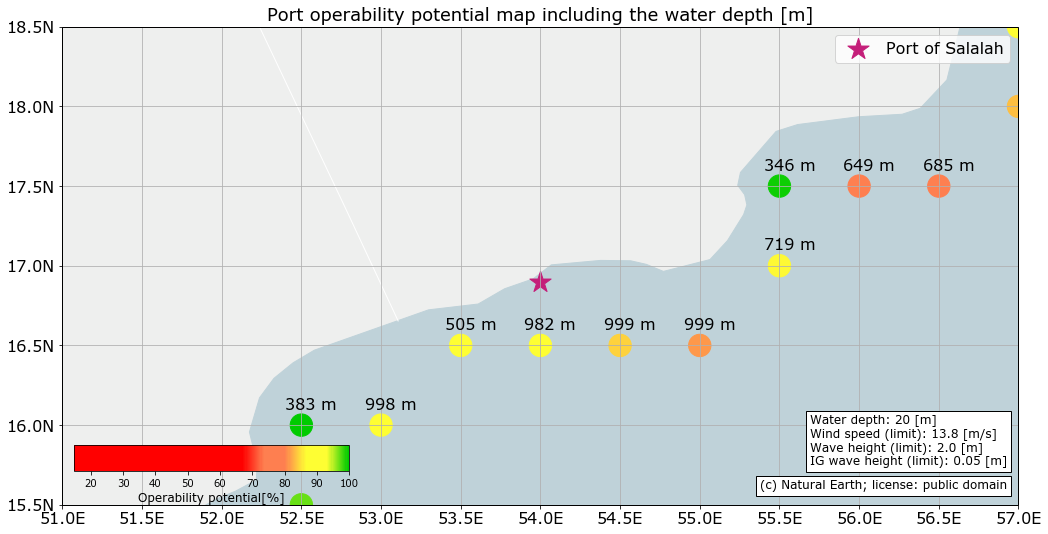

In [103]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(51,57)
_ = ax.set_ylim(15.5,18.5)
_ = ax.set_xticks(np.linspace(51,57, num=13), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(15.5,18.5, num=7), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.1f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

pc = ax.scatter(data['lon'],data['lat'], c=data['operability'], s=500, cmap=cmoperability)#, cmap='RdYlGn_r')
ax.text(52.4,16.1,'383 m', fontsize=16)
ax.text(52.9,16.1,'998 m', fontsize=16)
ax.text(53.4,16.6,'505 m', fontsize=16)
ax.text(53.9,16.6,'982 m', fontsize=16)
ax.text(54.4,16.6,'999 m', fontsize=16)
ax.text(54.9,16.6,'999 m', fontsize=16)
ax.text(55.4,17.1,'719 m', fontsize=16)
ax.text(55.4,17.6,'346 m', fontsize=16)
ax.text(55.9,17.6,'649 m', fontsize=16)
ax.text(56.4,17.6,'685 m', fontsize=16)
ax.scatter(54, 16.9, c='#c41e79', marker='*', s=500, label='Port of Salalah')      

ax.tick_params(axis='both', labelsize=16) #  which='both',
ax.text(55.69, 15.75, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
ax.text(55.38, 15.6, '(c) Natural Earth; license: public domain', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
cax = plt.axes([0.01,0.103,0.239,0.04])
cbar = plt.colorbar(pc, ax=ax, cax=cax, label='Operability potential[%]', orientation='horizontal')
cbar.set_label('Operability potential[%]', size=12)
ax.legend(fontsize=16)
ax.set_title('Port operability potential map including the water depth [m]', fontsize=18)
plt.savefig('global_port_operability_map_4_zoom.png', dpi=300, bbox_inches='tight');

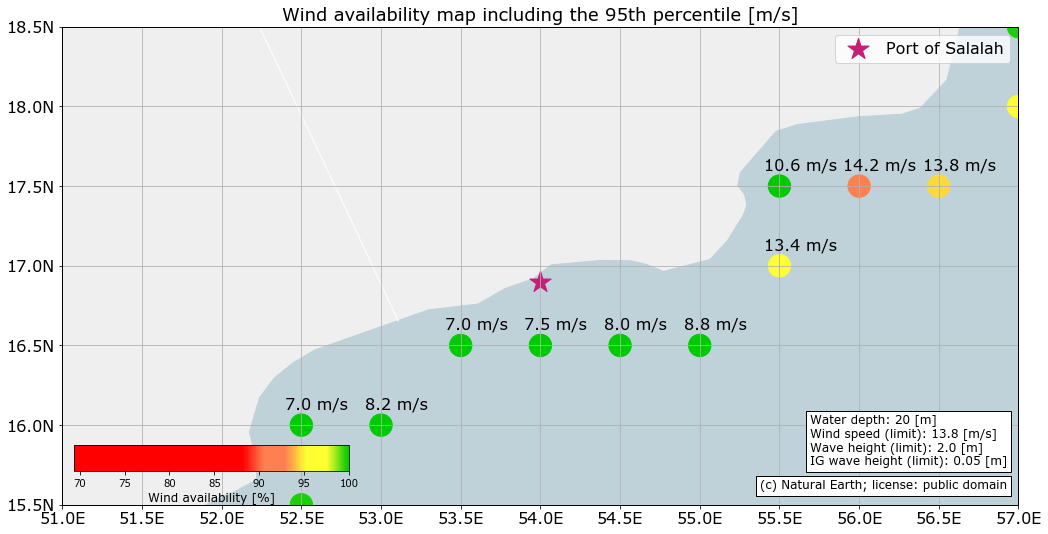

In [102]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(51,57)
_ = ax.set_ylim(15.5,18.5)
_ = ax.set_xticks(np.linspace(51,57, num=13), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(15.5,18.5, num=7), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.1f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

pc = ax.scatter(data['lon'],data['lat'], c=data['windAvUp'], s=500, cmap=cmoperability)#, cmap='RdYlGn_r')
ax.text(52.4,16.1,'7.0 m/s', fontsize=16)
ax.text(52.9,16.1,'8.2 m/s', fontsize=16)
ax.text(53.4,16.6,'7.0 m/s', fontsize=16)
ax.text(53.9,16.6,'7.5 m/s', fontsize=16)
ax.text(54.4,16.6,'8.0 m/s', fontsize=16)
ax.text(54.9,16.6,'8.8 m/s', fontsize=16)
ax.text(55.4,17.1,'13.4 m/s', fontsize=16)
ax.text(55.4,17.6,'10.6 m/s', fontsize=16)
ax.text(55.9,17.6,'14.2 m/s', fontsize=16)
ax.text(56.4,17.6,'13.8 m/s', fontsize=16)
ax.scatter(54, 16.9, c='#c41e79', marker='*', s=500, label='Port of Salalah')      

ax.tick_params(axis='both', labelsize=16) #  which='both',
ax.text(55.69, 15.75, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
ax.text(55.38, 15.6, '(c) Natural Earth; license: public domain', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
cax = plt.axes([0.01,0.103,0.239,0.04])
cbar = plt.colorbar(pc, ax=ax, cax=cax, label='Wind availability[%]', orientation='horizontal')
cbar.set_label('Wind availability [%]', size=12)
ax.legend(fontsize=16)
ax.set_title('Wind availability map including the 95th percentile [m/s]', fontsize=18)
plt.savefig('global_port_operability_map_4_zoom_wind.png', dpi=300, bbox_inches='tight');

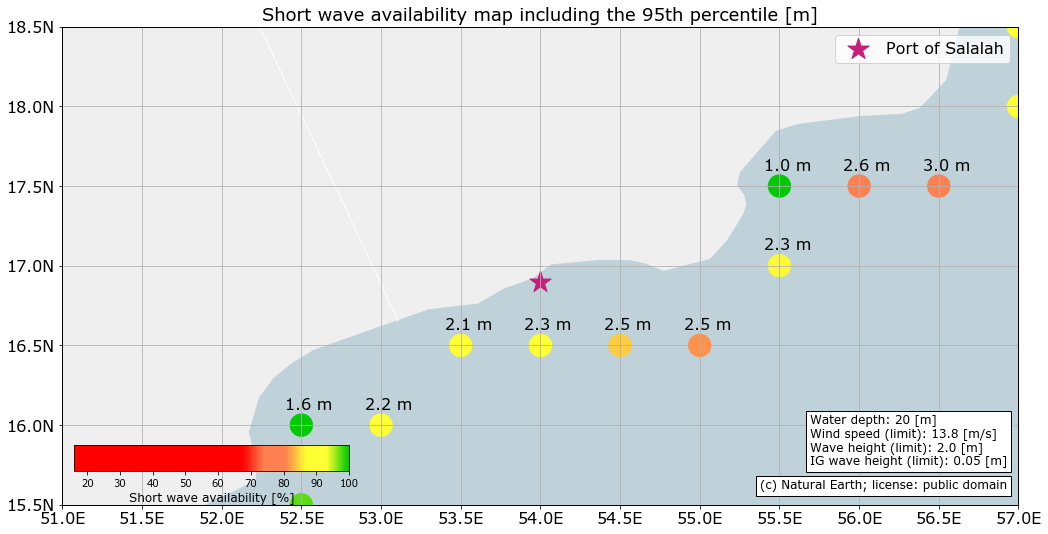

In [101]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(51,57)
_ = ax.set_ylim(15.5,18.5)
_ = ax.set_xticks(np.linspace(51,57, num=13), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(15.5,18.5, num=7), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.1f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

pc = ax.scatter(data['lon'],data['lat'], c=data['swhAvUp'], s=500, cmap=cmoperability)#, cmap='RdYlGn_r')
ax.text(52.4,16.1,'1.6 m', fontsize=16)
ax.text(52.9,16.1,'2.2 m', fontsize=16)
ax.text(53.4,16.6,'2.1 m', fontsize=16)
ax.text(53.9,16.6,'2.3 m', fontsize=16)
ax.text(54.4,16.6,'2.5 m', fontsize=16)
ax.text(54.9,16.6,'2.5 m', fontsize=16)
ax.text(55.4,17.1,'2.3 m', fontsize=16)
ax.text(55.4,17.6,'1.0 m', fontsize=16)
ax.text(55.9,17.6,'2.6 m', fontsize=16)
ax.text(56.4,17.6,'3.0 m', fontsize=16)
ax.scatter(54, 16.9, c='#c41e79', marker='*', s=500, label='Port of Salalah')      

ax.tick_params(axis='both', labelsize=16) #  which='both',
ax.text(55.69, 15.75, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
ax.text(55.38, 15.6, '(c) Natural Earth; license: public domain', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
cax = plt.axes([0.01,0.103,0.239,0.04])
cbar = plt.colorbar(pc, ax=ax, cax=cax, label='Short wave availability[%]', orientation='horizontal')
cbar.set_label('Short wave availability [%]', size=12)
ax.legend(fontsize=16)
ax.set_title('Short wave availability map including the 95th percentile [m]', fontsize=18)
plt.savefig('global_port_operability_map_4_zoom_wave.png', dpi=300, bbox_inches='tight');

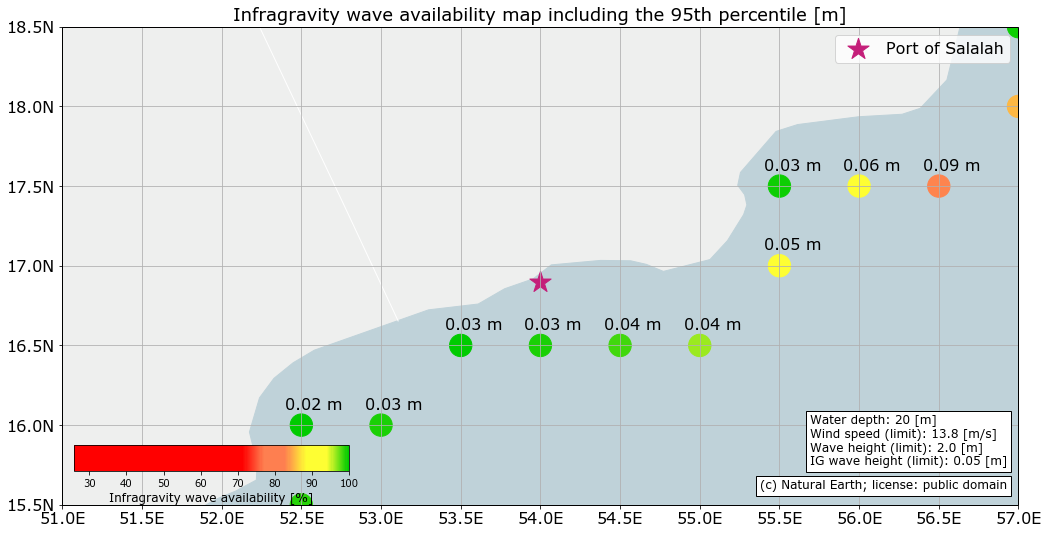

In [104]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(51,57)
_ = ax.set_ylim(15.5,18.5)
_ = ax.set_xticks(np.linspace(51,57, num=13), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(15.5,18.5, num=7), crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.1f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

pc = ax.scatter(data['lon'],data['lat'], c=data['igAvUp'], s=500, cmap=cmoperability)#, cmap='RdYlGn_r')
ax.text(52.4,16.1,'0.02 m', fontsize=16)
ax.text(52.9,16.1,'0.03 m', fontsize=16)
ax.text(53.4,16.6,'0.03 m', fontsize=16)
ax.text(53.9,16.6,'0.03 m', fontsize=16)
ax.text(54.4,16.6,'0.04 m', fontsize=16)
ax.text(54.9,16.6,'0.04 m', fontsize=16)
ax.text(55.4,17.1,'0.05 m', fontsize=16)
ax.text(55.4,17.6,'0.03 m', fontsize=16)
ax.text(55.9,17.6,'0.06 m', fontsize=16)
ax.text(56.4,17.6,'0.09 m', fontsize=16)
ax.scatter(54, 16.9, c='#c41e79', marker='*', s=500, label='Port of Salalah')      

ax.tick_params(axis='both', labelsize=16) #  which='both',
ax.text(55.69, 15.75, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
ax.text(55.38, 15.6, '(c) Natural Earth; license: public domain', bbox={'facecolor': 'white', 'alpha': 1}, fontsize=12)
cax = plt.axes([0.01,0.103,0.239,0.04])
cbar = plt.colorbar(pc, ax=ax, cax=cax, label='Infragravity wave availability[%]', orientation='horizontal')
cbar.set_label('Infragravity wave availability [%]', size=12)
ax.legend(fontsize=16)
ax.set_title('Infragravity wave availability map including the 95th percentile [m]', fontsize=18)
plt.savefig('global_port_operability_map_4_zoom_ig.png', dpi=300, bbox_inches='tight');

Text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

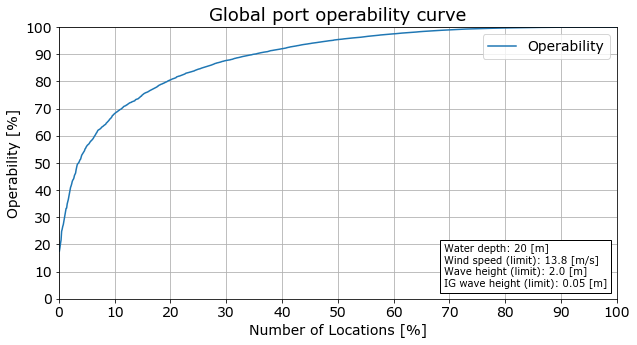

In [5]:
operability = data.operability.dropna().copy()
windOP = data.windAvUp.dropna().copy()
wavesOP = data.swhAvUp.dropna().copy()
igOP = data.igAvUp.dropna().copy()

x = np.arange(0.001,1.001,0.001)
tot_operability = operability.quantile(q=x)
wind_availability = windOP.quantile(q=x)
waves_availability = wavesOP.quantile(q=x)
infragravity_availability = igOP.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability, label='Operability')
#ax.plot(x*100, wind_availability, color=cwind, label='Wind')
#ax.plot(x*100, waves_availability, color=cwave, label='Short waves')
#ax.plot(x*100, infragravity_availability, color=cig, label='Infragravity waves')
ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curve', fontsize=18)
ax.set_xlabel('Number of Locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right',  fontsize=14, markerscale=1)
ax.text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_operability_curve.png', dpi=300, bbox_inches='tight');

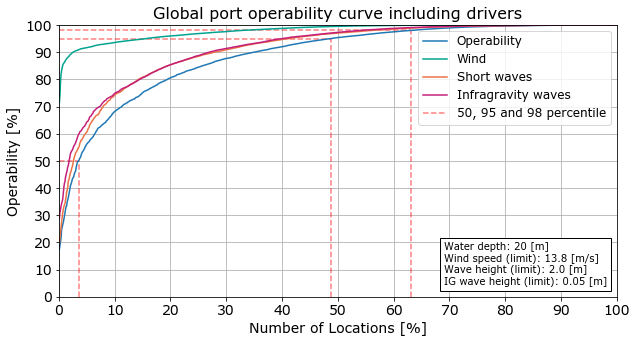

In [22]:
operability = data.operability.dropna().copy()
operability1 = np.sort(operability)
x = np.arange(0.001,1.001,0.001)
tot_operability = operability.quantile(q=x)
p50 = np.quantile(operability,0.5)
p95 = np.quantile(operability,0.95)
p98 = np.quantile(operability,0.98)
windOP = data.windAvUp.dropna().copy()
wavesOP = data.swhAvUp.dropna().copy()
igOP = data.igAvUp.dropna().copy()
wind_availability = windOP.quantile(q=x)
waves_availability = wavesOP.quantile(q=x)
infragravity_availability = igOP.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability, label='Operability')
plt.hlines(98,0,find_nearest(operability1,98)/len(operability)*100,'r',linestyle='dashed', alpha=0.5, label='50, 95 and 98 percentile')
plt.hlines(95,0,find_nearest(operability1,95)/len(operability)*100,'r',linestyle='dashed', alpha=0.5)
plt.hlines(50,0,find_nearest(operability1,50)/len(operability)*100,'r',linestyle='dashed', alpha=0.5)
plt.vlines(find_nearest(operability1,98)/len(operability)*100,0,98,'r',linestyle='dashed', alpha=0.5)
plt.vlines(find_nearest(operability1,95)/len(operability)*100,0,95,'r',linestyle='dashed', alpha=0.5)
plt.vlines(find_nearest(operability1,50)/len(operability)*100,0,50,'r',linestyle='dashed', alpha=0.5)
ax.plot(x*100, wind_availability, color=cwind, label='Wind')
ax.plot(x*100, waves_availability, color=cwave, label='Short waves')
ax.plot(x*100, infragravity_availability, color=cig, label='Infragravity waves')

ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curve including drivers', fontsize=16)
ax.set_xlabel('Number of Locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right',  fontsize=12, markerscale=1)
ax.text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

plt.savefig('global_port_operability_curve_with_driversandpercentiles.png', dpi=300, bbox_inches='tight');

Text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]')

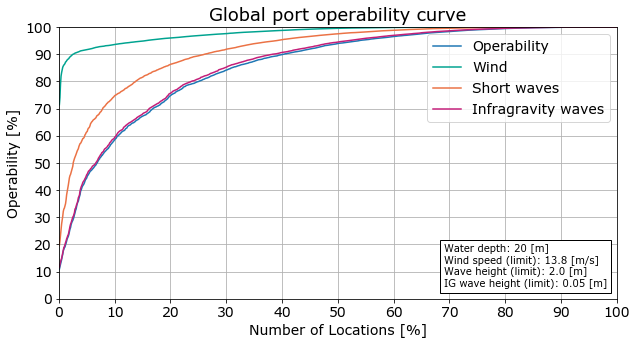

In [6]:
operability = data.operability.dropna().copy()
windOP = data.windAvUp.dropna().copy()
wavesOP = data.swhAvUp.dropna().copy()
igOP = data.igAvUp.dropna().copy()

x = np.arange(0.001,1.001,0.001)
tot_operability = operability.quantile(q=x)
wind_availability = windOP.quantile(q=x)
waves_availability = wavesOP.quantile(q=x)
infragravity_availability = igOP.quantile(q=x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x*100, tot_operability, label='Operability')
ax.plot(x*100, wind_availability, color=cwind, label='Wind')
ax.plot(x*100, waves_availability, color=cwave, label='Short waves')
ax.plot(x*100, infragravity_availability, color=cig, label='Infragravity waves')
ax.grid()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_title('Global port operability curve', fontsize=18)
ax.set_xlabel('Number of Locations [%]', size=14)
ax.set_ylabel('Operability [%]', size=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 110, step=10));
ax.set_yticks(np.arange(0, 110, step=10));
ax.legend(loc='upper right',  fontsize=14, markerscale=1)
ax.text(69, 4.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})

#plt.savefig('global_port_operability_curve_includ_drivers.png', dpi=300, bbox_inches='tight');

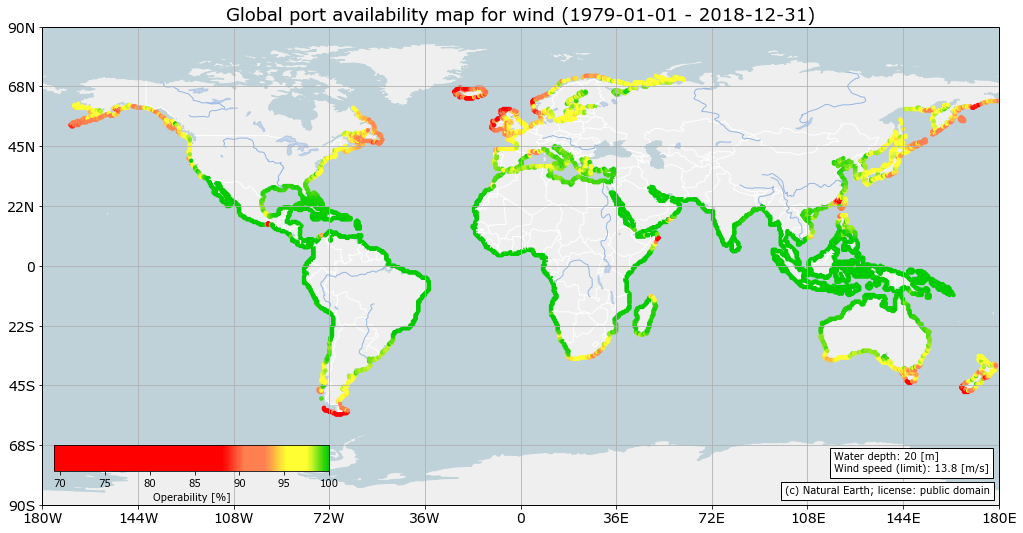

In [67]:
y = 'windAvUp'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(118, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port availability map for wind (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_map_wind_speed.png', dpi=300, bbox_inches='tight');

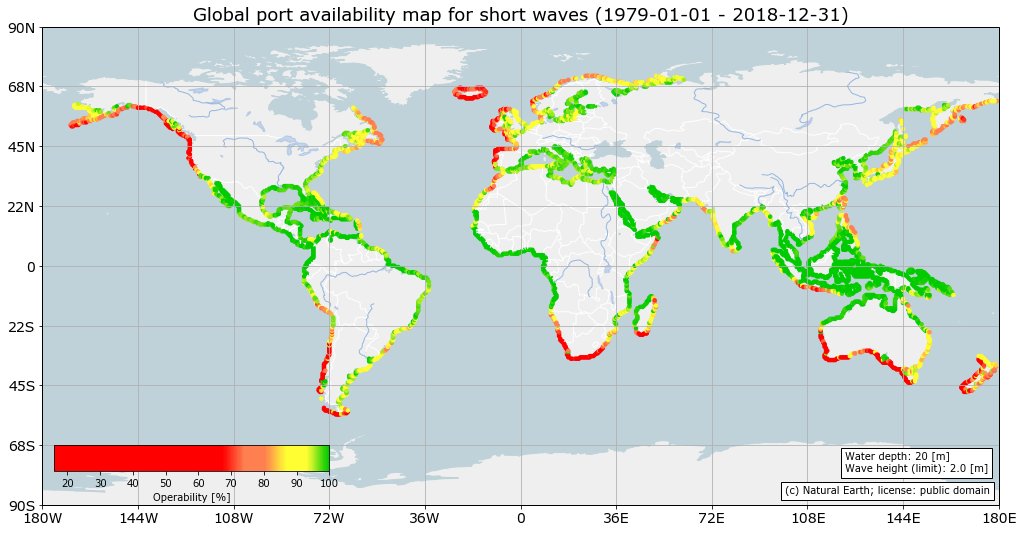

In [65]:
y = 'swhAvUp'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(122, -77.5, 'Water depth: 20 [m] \nWave height (limit): 2.0 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port availability map for short waves (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_map_wave_height.png', dpi=300, bbox_inches='tight');

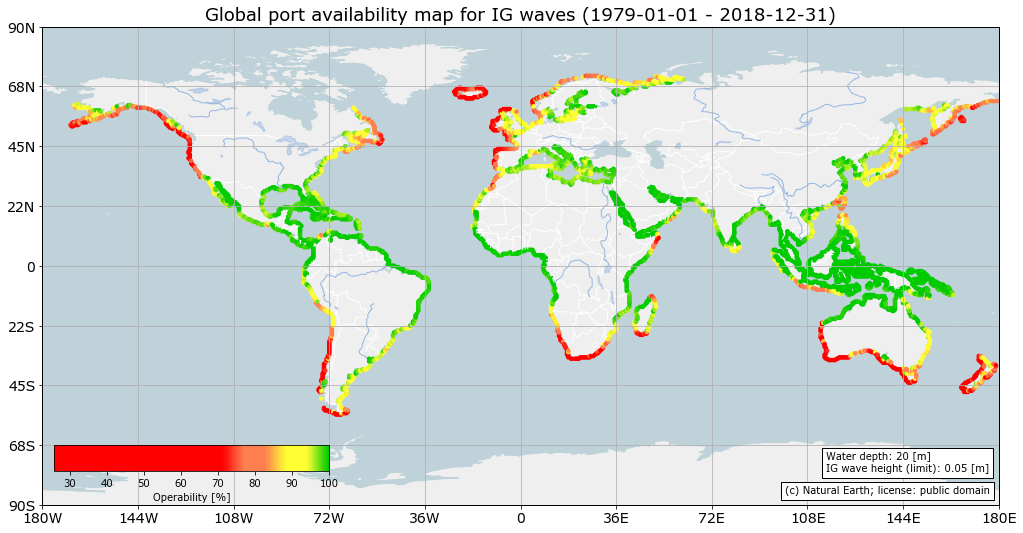

In [61]:
y = 'igAvUp'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmoperability)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Global port availability map for IG waves (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_map_ig_wave.png', dpi=300, bbox_inches='tight');

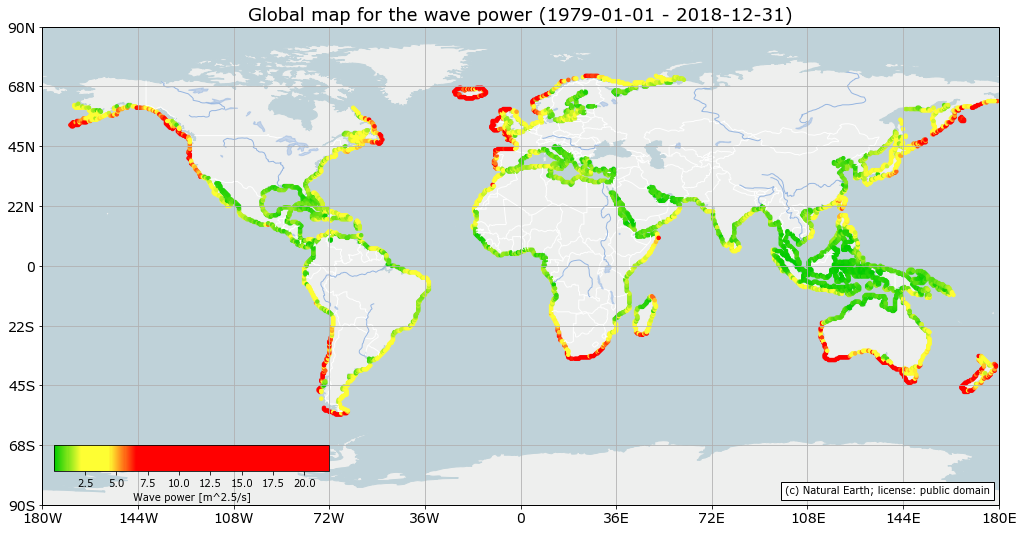

In [78]:
y = 'wavePo'
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
pc = ax.scatter(data['lon'],data['lat'], c=data[y], s=12, cmap=cmwavepower)#, cmap='RdYlGn_r')
       
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
#ax.text(115, -77.5, 'Water depth: 20 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
cax = plt.axes([0.01,0.103,0.239,0.04])
plt.colorbar(pc, ax=ax, cax=cax, label='Wave power [m^2.5/s]', orientation='horizontal')
ax.set_title('Global map for the wave power (1979-01-01 - 2018-12-31)', fontsize=18)
plt.savefig('global_port_availability_wave_power.png', dpi=300, bbox_inches='tight');

In [10]:
driver1 = data[data['main_driver']==1]
driver2 = data[data['main_driver']==2]
driver25 = data[data['main_driver']==2.5]
driver3 = data[data['main_driver']==3]

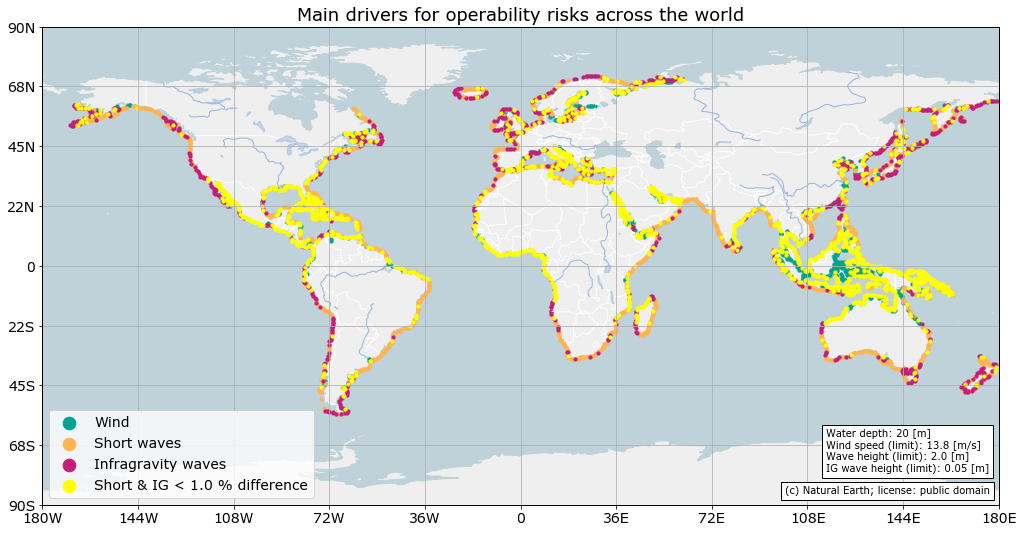

In [11]:
plt.figure(figsize=(16, 9), facecolor='white')
ax = plt.axes([0, 0.02, 0.83, 0.8],projection=cartopy.crs.PlateCarree())
ax.grid()
_ = ax.set_xlim(-180,180)
_ = ax.set_ylim(-90,90)
_ = ax.set_xticks(np.linspace(-180,180, num=11), crs=cartopy.crs.PlateCarree())
_ = ax.set_yticks(np.linspace(-90,90, num=9), crs=cartopy.crs.PlateCarree())
#pc = ax.scatter(driver0['lon'],driver0['lat'],c='#00CC00', s=10, marker='o', label='Operability > 95 %') #c=driver0['operability'], cmap=cmoperability
pc = ax.scatter(driver1['lon'],driver1['lat'],c=cwind, s=10, marker='o', label='Wind') #c=driver1['operability'], cmap=cmoperability
pc = ax.scatter(driver2['lon'],driver2['lat'], c='#FFB450', s=10, marker='o', label='Short waves') #c=driver2['operability'], cmap=cmoperability
pc = ax.scatter(driver3['lon'],driver3['lat'], c=cig, s=10, marker='o', label='Infragravity waves') #c=driver3['operability'], cmap=cmoperability
pc = ax.scatter(driver25['lon'],driver25['lat'], c='yellow', s=10, marker='o', label='Short & IG < 1.0 % difference') #c=driver2['operability'], cmap=cmoperability

ax.add_feature(cartopy.feature.LAND.with_scale('50m'),facecolor='#EEEFEE')
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'),facecolor='#bfd2d9')
#ax.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='',dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.tick_params(axis='both', labelsize=14) #  which='both',
ax.text(115, -77.5, 'Water depth: 20 [m] \nWind speed (limit): 13.8 [m/s] \nWave height (limit): 2.0 [m] \nIG wave height (limit): 0.05 [m]', bbox={'facecolor': 'white', 'alpha': 1})
text = AnchoredText(('(c) Natural Earth; license: public domain'), loc=4, frameon=True)
ax.add_artist(text)
ax.legend(loc='lower left', fontsize=14, markerscale=4)
#cax = plt.axes([0.01,0.103,0.239,0.04])
#plt.colorbar(pc, ax=ax, cax=cax, label='Operability [%]', orientation='horizontal')
ax.set_title('Main drivers for operability risks across the world', fontsize=18)
plt.savefig('global_port_operability_main_cause_2.png', dpi=300, bbox_inches='tight');

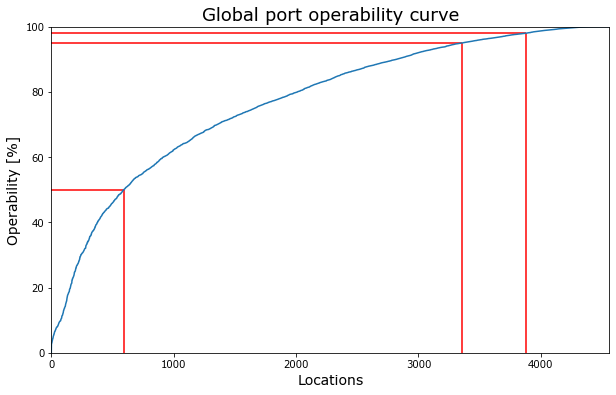

In [333]:
operability = np.sort(data7.operability)
operability[-1] = 0
p50 = np.quantile(operability,0.5)
p95 = np.quantile(operability,0.95)
p98 = np.quantile(operability,0.98)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.sort(data7.operability), label='Operability')
plt.hlines(98,0,find_nearest(operability,98),'r')
plt.hlines(95,0,find_nearest(operability,95),'r')
plt.hlines(50,0,find_nearest(operability,50),'r')
plt.vlines(find_nearest(operability,98),0,98,'r')
plt.vlines(find_nearest(operability,95),0,95,'r')
plt.vlines(find_nearest(operability,50),0,50,'r')
ax.set_ylabel('Operability [%]', size=14)
ax.set_xlabel('Locations', size=14)
ax.set_title('Global port operability curve', fontsize=18)
ax.set_xlim(0,4560)
ax.set_ylim(0,100)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),fancybox=True, ncol=1, fontsize=14)
plt.savefig('global_port_operability_curve.png', dpi=300, bbox_inches='tight');